In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder 
import os

for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        csv_file = os.path.join(dirname, filename)

../data/mushrooms.csv


In [2]:
mushroom_df = pd.read_csv(csv_file)

# Data Cleaning

In [3]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_df.shape

(8124, 23)

Dataframe contains 8124 rows and 23 columns. The 23 columns include the label/class.

In [5]:
mushroom_df.isnull().values.any()

False

There are no rows with null/nan values

8124 rows
23 columns

# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt

In [7]:
def graph(name, u):
    mushroom_df[name].value_counts().plot(kind="bar",ax=u, color=colors)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.grid(True)
    u.set_title(name.replace("-"," "), fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+100),
                   ha="center", va='center', fontsize=7, fontweight="bold")

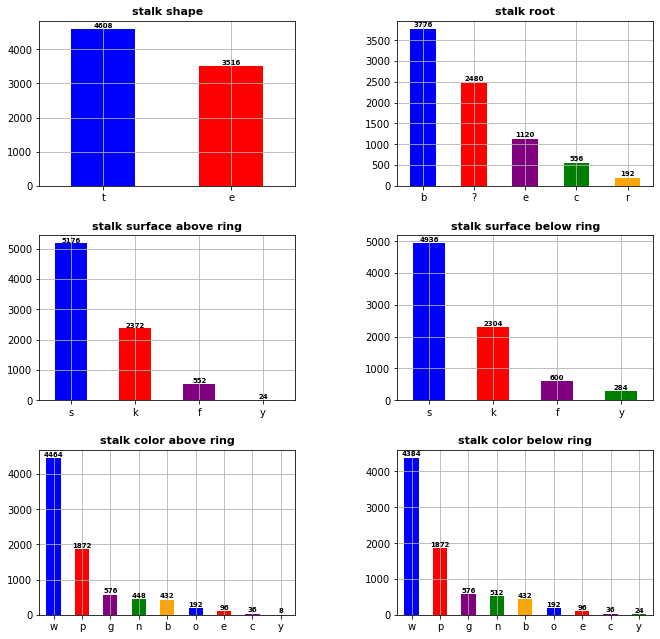

In [8]:
fig2, ax2 = plt.subplots(3,2, figsize=(11, 10), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["blue","red","purple","green","orange"]

graph("stalk-shape",ax2[0,0])
graph("stalk-root",ax2[0,1])
graph("stalk-surface-above-ring",ax2[1,0])
graph("stalk-surface-below-ring",ax2[1,1])
graph("stalk-color-above-ring",ax2[2,0])
graph("stalk-color-below-ring",ax2[2,1])
plt.rcParams['axes.axisbelow'] = True

# Training

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [10]:
features = mushroom_df.drop(["class"], axis=1)
label = mushroom_df["class"]

In [11]:
features.shape

(8124, 22)

In [12]:
# features = pd.get_dummies(features) # one hot encoding

le = LabelEncoder()
label = le.fit_transform(label)

In [13]:
with open('mapping.txt') as mappings_file:
        lines = mappings_file.readlines()

outer_list = list()
for line in lines:
    feature, feature_attrs = line.split(":")[0], line.split(":")[-1].replace(" ", "")
    feature_attrs_list = feature_attrs.split(",")
    inner_list = list()
    for feature_attr in feature_attrs_list:
        feature_attr_val = feature_attr.split("=")[-1].replace("\n", "")
        inner_list.append(feature_attr_val)
    outer_list.append(inner_list)

In [14]:
enc2 = outer_list

In [15]:
ohe2 = OneHotEncoder(categories=enc2, handle_unknown='ignore', sparse=False)

In [16]:
colnames= ['{}_{}'.format(col,val) for col,unique_values in zip(features.columns, ohe2.categories) \
                                       for val in unique_values]
df_final = pd.DataFrame(ohe2.fit_transform(features), columns=colnames) 

In [17]:
df_final.shape

(8124, 126)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_final,label, test_size=0.3)

clf = LogisticRegression(solver="lbfgs").fit(X_train,y_train)

In [19]:
predicted = clf.predict(X_test)
predicted_proba = clf.predict(X_test)

print("Accuracy is: "+ str(clf.score(X_test,y_test)))
print("Recall score is: " + str(round(recall_score(y_test, predicted),3)))
print("Precision score is: " + str(round(precision_score(y_test, predicted),3)))
print("F1 score is: " + str(round(f1_score(y_test, predicted),3)))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, predicted))

Accuracy is: 1.0
Recall score is: 1.0
Precision score is: 1.0
F1 score is: 1.0

Confusion matrix:
[[1242    0]
 [   0 1196]]


- Recall score (ability of a model to find all the relevant cases within a dataset)
- Precision score (ability of a classification model to identify only the relevant data points)
- F1 score measure of a test's accuracy

Model is having high True Positive and high False Negatives

# Save Model

In [20]:
import joblib

In [21]:
month = 'march'
year = '2020'
filename = '../src/DatabaseHelper/model/mushroom_classifier_{}_{}.sav'.format(month, year)
joblib.dump(clf, filename)

['../src/DatabaseHelper/model/mushroom_classifier_march_2020.sav']

# Predicting on a data point

In [22]:
clf.predict(X_test.iloc[0].to_numpy().reshape(1,-1))

array([0])

In [23]:
mushroom_df.iloc[1474]

class                       e
cap-shape                   x
cap-surface                 f
cap-color                   g
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  h
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           n
population                  a
habitat                     g
Name: 1474, dtype: object